In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
sys.path.append('../../') # Load src folder
from src.datasets.zipf import get_zipf_probs, get_dataset_samples, ZipfOnlineDatasetLoader


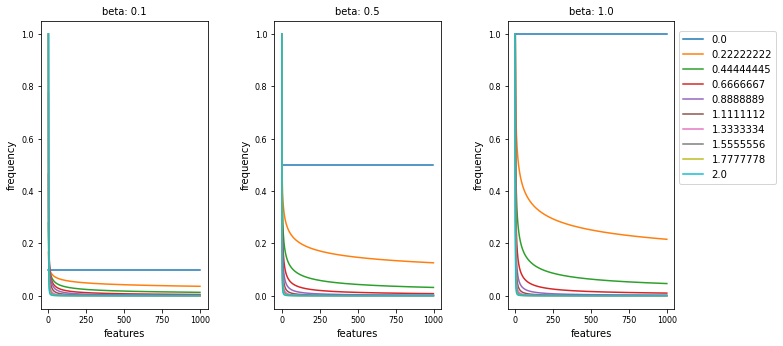

In [2]:
## Plotting the probabilities with different alpha and beta parameters
## get_zipf_probs(n_dims, alpha, beta) --> alpha controls skewness / beta controls backround probability

n_dims = 1000
space = torch.linspace(0, 2.0, 10)
betas = [0.1, 0.5, 1.0]
fig = plt.figure(figsize=(11, 5)) 
x_3 = 0

for beta in betas:
    x_3 += 1
    ax = fig.add_subplot(1,3,x_3)
    for alpha in list(space):
        x = get_zipf_probs(n_dims, alpha, beta)
        plt.plot(x.cpu().detach().numpy())
        plt.xlabel('features')
        plt.ylabel('frequency')
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
    plt.title('beta: {}'.format(beta),fontsize=10)
#plt.legend()
plt.legend(list(np.array(space)),loc='center left', bbox_to_anchor=(1, 0.7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.25)
plt.savefig('../../results/plots_datasets/zipf_difalphabeta', bbox_inches='tight')
plt.show()
plt.close()

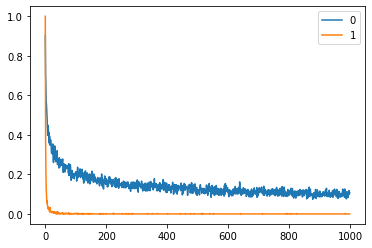

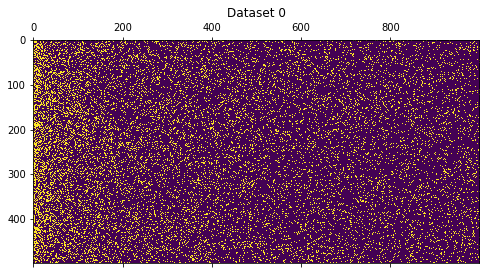

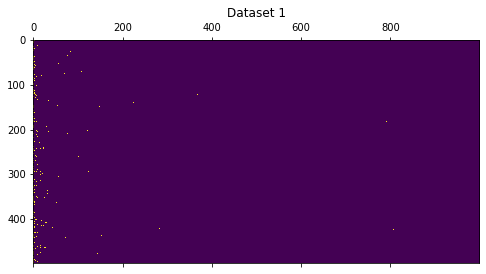

In [13]:
## Samples datasets following a zipf distributed distributions
## re-run to see more examples
## get_dataset_samples(n_dims, num_batches, num_samples, alpha_min=0.0, alpha_max=2.0, beta_min=0.0, beta_max=1.0, alpha=None, beta=None)

x = get_dataset_samples(n_dims, 32, 500, alpha_min=0.0, alpha_max=2.0, beta_min=0.0, beta_max=1.0, alpha=None, beta=None)

y = torch.mean(x, dim=1)
plt.plot(y[0:2,:].T.cpu().detach().numpy()) # Taking two batches
plt.legend([0,1])
plt.show()

plt.matshow(x[0,:,:].cpu().detach().numpy())
plt.title('Dataset 0')
plt.show()
plt.matshow(x[1,:,:].cpu().detach().numpy())
plt.title('Dataset 1')
plt.show()

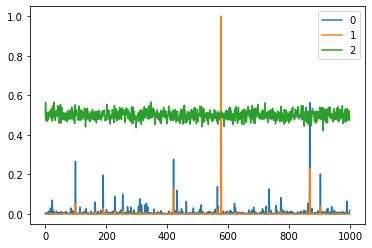

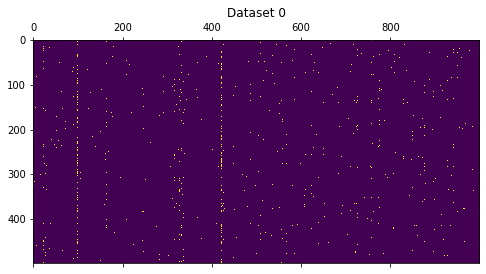

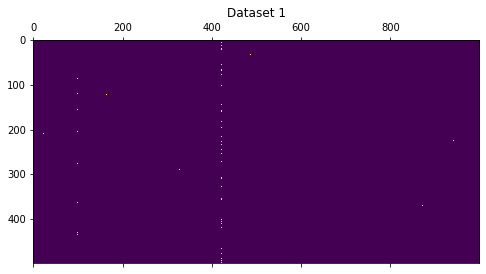

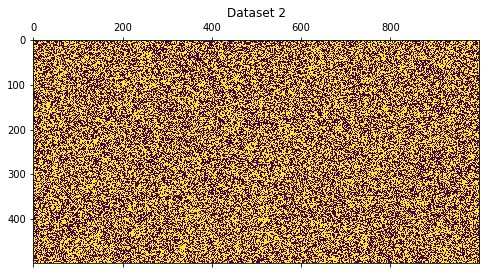

In [18]:
## ZipfOnlineDatasetLoader internally calls get_dataset_samples() and performs shuffleing
    
batch_size, n_dims, num_samples =  3, 1000, 500    
zipfdatasetloader = ZipfOnlineDatasetLoader(batch_size, n_dims, num_samples)

for x,y in zipfdatasetloader:
    plt.plot(y.T.cpu().detach().numpy())
    plt.legend([0,1,2])
    plt.show()

    plt.matshow(x[0,:,:].cpu().detach().numpy())
    plt.title('Dataset 0')
    plt.show()
    plt.matshow(x[1,:,:].cpu().detach().numpy())
    plt.title('Dataset 1')
    plt.show()
    plt.matshow(x[2,:,:].cpu().detach().numpy())
    plt.title('Dataset 2')
    plt.show()
    break